## PyRCA: simulation

In [11]:
%reload_ext autoreload
%autoreload 2


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 7
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = True


In [3]:
import sys
sys.path.append('../')


In [5]:
from PyRCA.pyrca.simulation import data_gen


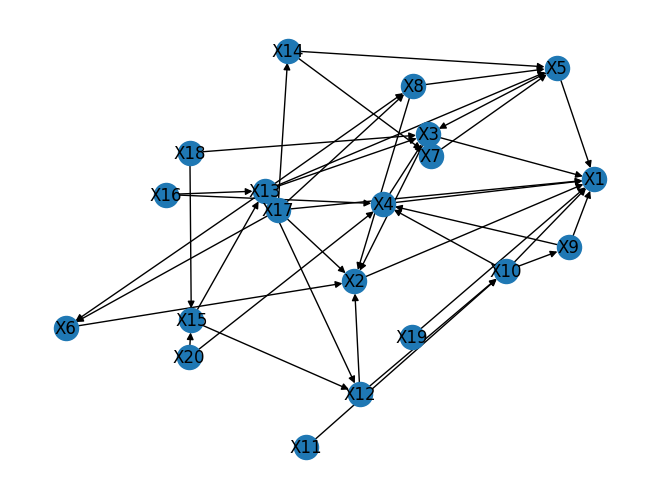

In [6]:
import networkx as nx

graph_matrix = data_gen.DAGGen(data_gen.DAGGenConfig(num_node=20, num_edge=40)).gen()
G = nx.DiGraph(graph_matrix)

# transform node names from 0 to N-1 to X1 to XN
no_of_var = graph_matrix.shape[0]
original_names = [i for i in range(no_of_var)]
node_names = [("X%d" % (i + 1)) for i in range(no_of_var)]
mapping = dict(zip(original_names, node_names))
G = nx.relabel_nodes(G, mapping)

nx.draw(G, with_labels = True)


In [7]:
config = data_gen.DataGenConfig(dag=graph_matrix, func_type='identity', noise_type='laplace', weight_generator='normal', num_samples=160)
normal_data, parent_weights, noise_weights, func_form, noise_form = data_gen.DataGen(config).gen()


In [8]:
normal_data


array([[-2.78306410e+01, -2.52900937e+00, -8.70106409e+00, ...,
        -3.49089736e-01,  9.60017589e-01,  3.31211071e-03],
       [ 7.57653916e+00,  6.05578001e+00,  5.39805909e+00, ...,
        -2.08402672e-01, -4.64977833e-01,  1.01973386e+00],
       [-4.77411339e+01, -7.01521654e+00, -7.25070619e+00, ...,
         4.96463388e-01,  2.52200615e+00,  4.43969774e-01],
       ...,
       [-1.16987341e+01, -1.17843870e+01, -9.41341031e+00, ...,
        -3.32969207e-02, -1.99112292e+00,  6.87453889e-01],
       [-2.50836758e+01, -5.75931639e+00, -1.00377313e+01, ...,
         6.11317126e-01,  4.29679082e-02,  3.56615627e+00],
       [-2.21772085e+01, -7.68892878e+00, -1.01628462e+01, ...,
        -1.02197481e+00,  8.30587983e-01,  4.60514814e+00]])

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

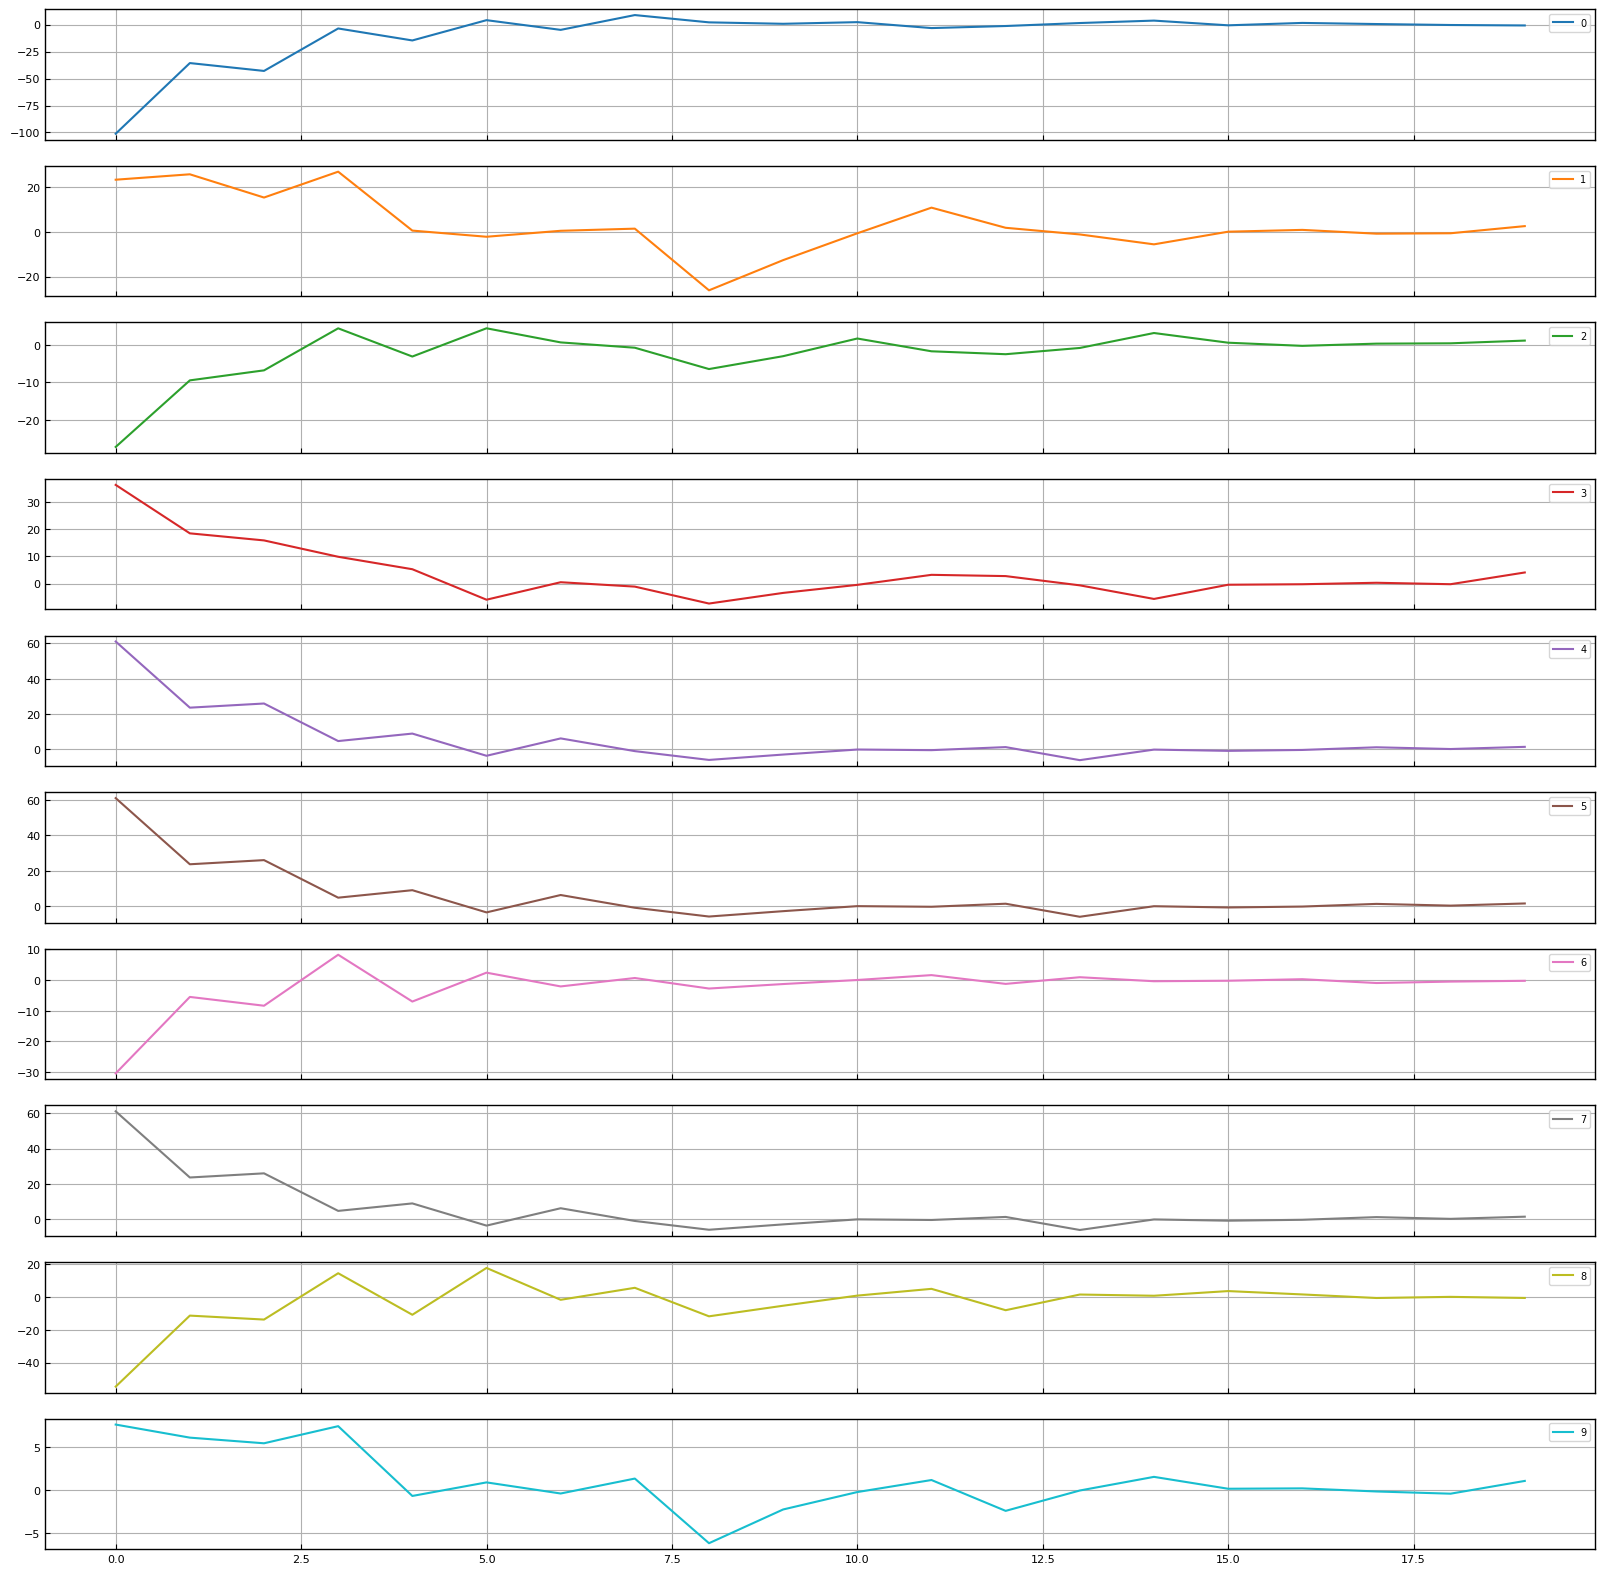

In [9]:
pd.DataFrame(normal_data[np.random.choice(normal_data.shape[1], size=10)].T).plot(subplots=True, figsize=(20, 20))


In [ ]:
_SLI = 0
tau = 3
baseline = normal_data[:, _SLI].mean()
sli_sigma = normal_data[:, _SLI].std()
threshold = tau * sli_sigma


In [ ]:
config = data_gen.AnomalyDataGenConfig(
    parent_weights=parent_weights,
    noise_weights=noise_weights,
    func_type=func_form,
    noise_type=noise_form,
    threshold=threshold,
    baseline=baseline,
    anomaly_type=1,
    num_samples=20,
)
anomaly_data, fault = data_gen.AnomalyDataGen(config).gen()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

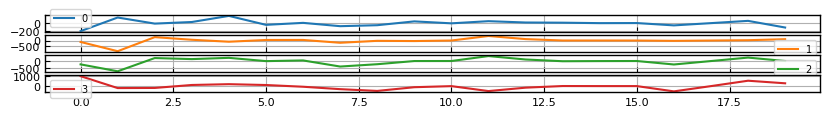

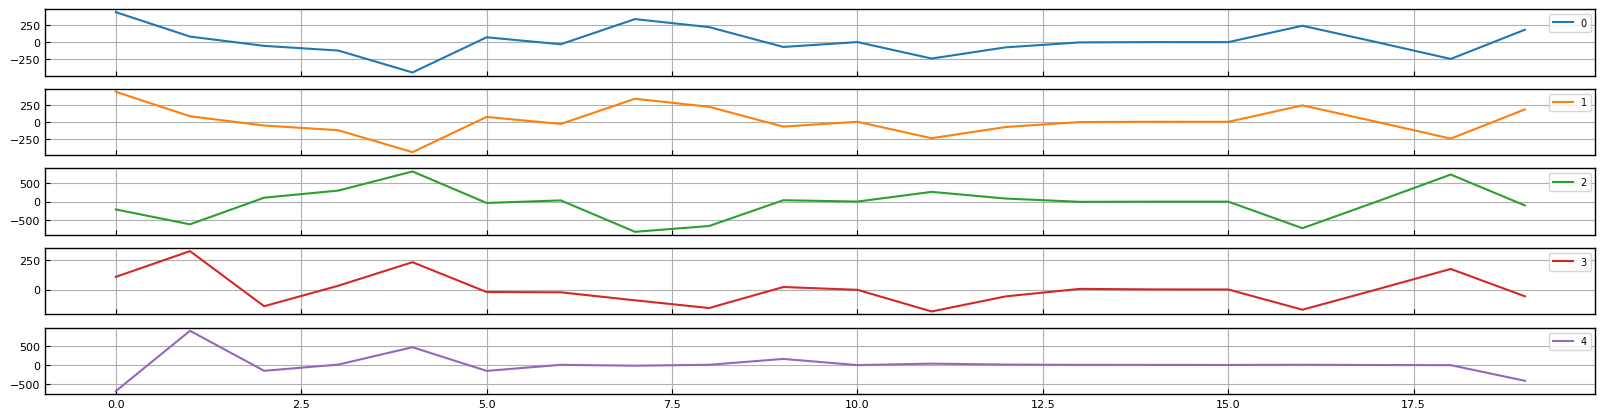

In [ ]:
pd.DataFrame(anomaly_data[np.where(fault != 0)[0]].T).plot(subplots=True, figsize=(10, 1))
pd.DataFrame(anomaly_data[np.random.choice(anomaly_data.shape[1], size=5)].T).plot(subplots=True, figsize=(20, 5))


The generated graph: True is directed and acyclic.


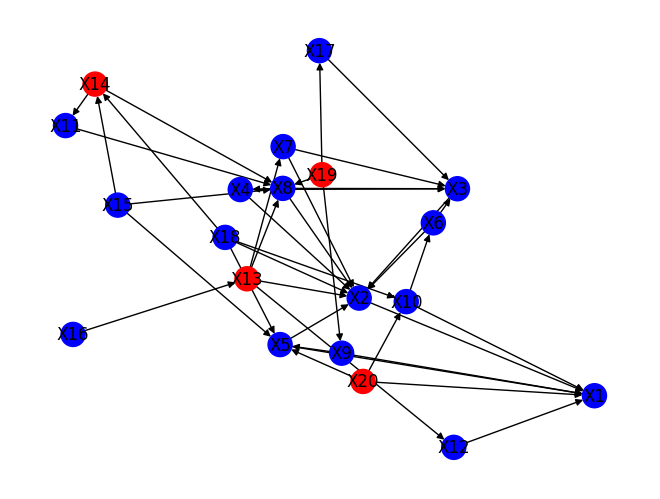

In [ ]:
# constructure networkx graph from adjacent matrix
G = nx.DiGraph(graph_matrix)

# transform node names from 0 to N-1 to X1 to XN
no_of_var = graph_matrix.shape[0]
original_names = [i for i in range(no_of_var)]
node_names = [("X%d" % (i + 1)) for i in range(no_of_var)]
mapping = dict(zip(original_names, node_names))
G = nx.relabel_nodes(G, mapping)

# label the root cause nodes
no_of_var = graph_matrix.shape[0]
color_list = np.array(['blue','red'])
node_color_idx = np.zeros(no_of_var).astype(int)
node_color_idx[fault != 0] = 1
node_color = color_list[node_color_idx]
print(f"The generated graph: {nx.is_directed_acyclic_graph(G)} is directed and acyclic.")
nx.draw(G, with_labels = True, node_color=node_color)


In [3]:
import sys
sys.path.append('../PyRCA')


## Massive Experiments

In [10]:
import sys
sys.path.append('../PyRCA')


In [6]:
num_trials = 5
anomaly_types = [0, 1]
func_types = ["identity"]#"square", "sin", "tanh"]
noise_types = ["normal", "exponential", "uniform", "laplace"]
weight_generators = ["normal", "uniform"]
# _VALID_FUNC = ["identity", "square", "sin", "tanh"]
# _VALID_NOISE = ["normal", "exponential", "uniform", "laplace"]
# _VALID_WEIGHT = ["normal", "uniform"]
data_scale_params = [
    {"num_node": 50, "num_edge": 100, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 50, "num_edge": 200, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 100, "num_edge": 500, "num_normal_samples": 160, "num_abnormal_samples": 20},
    {"num_node": 100, "num_edge": 750, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 500, "num_edge": 5000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 60, "num_abnormal_samples": 60},
    # {"num_node": 100, "num_edge": 500, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 100, "num_edge": 500, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 200, "num_edge": 1000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 500, "num_edge": 5000, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 200, "num_edge": 1000, "num_normal_samples": 480, "num_abnormal_samples": 60},
    # {"num_node": 1200, "num_edge": 6000, "num_normal_samples": 160, "num_abnormal_samples": 80},
    # {"num_node": 300, "num_edge": 600, "num_normal_samples": 160, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 20, "num_abnormal_samples": 20},
    # {"num_node": 50, "num_edge": 100, "num_normal_samples": 60, "num_abnormal_samples": 60},
    # {"num_node": 1200, "num_edge": 6000, "num_normal_samples": 60, "num_abnormal_samples": 60},
]

# dataset = generate_datasets_from_param_sets(anomaly_types, data_scale_params, func_types, noise_types, weight_generators, num_trials)


### Feature Reduction Evaluation

In [ ]:
from simulation.feature_reduction import sweep_load_and_reduction


In [21]:
fl_results = sum([
    sweep_load_and_reduction(anomaly_types, data_scale_params, func_types, noise_types, weight_generators, [trial_no], n_jobs=-1) for trial_no in range(1, num_trials+1)
], [])


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: exponential, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: laplace, weight_generator:uniform, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 200, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: uniform, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 200, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_

In [23]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    fl_df = pd.DataFrame(fl_results).groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method"], as_index=True).mean().sort_index()
    display(fl_df)
    fl_df.reset_index().to_csv("materials/pyrca_feature_reduction_simulation_results.csv")


num_remained  \
anomaly_type num_node num_edge func_type noise_type  weight_generator num_normal_samples num_abnormal_samples reduction_method                 
0            50       100      identity  exponential normal           160                20                   BIRCH                     33.8   
                                                                                                              FluxInfer-AD              30.6   
                                                                                                              HDBS-R                     6.8   
                                                                                                              HDBS-SBD                   6.2   
                                                                                                              K-S test                  16.2   
                                                                                                              MetricSifter              15.6   
                                                                                                              NSigma                    37.0   
                                                                                                              None                      50.0   
                                                     uniform          160                20                   BIRCH                     30.2   
                                                                                                              FluxInfer-AD              26.4   
                                                                                                              HDBS-R                     7.4   
                                                                                                              HDBS-SBD                   5.0   
                                                                                                              K-S test                  11.2   
                                                                                                              MetricSifter              11.0   
                                                                                                              NSigma                    35.6   
                                                                                                              None                      50.0   
                                         laplace     normal           160                20                   BIRCH                     36.0   
                                                                                                              FluxInfer-AD              30.2   
                                                                                                              HDBS-R                     6.6   
                                                                                                              HDBS-SBD                   6.4   
                                                                                                              K-S test                  18.0   
                                                                                                              MetricSifter              16.0   
                                                                                                              NSigma                    37.2   
                                                                                                              None                      50.0   
                                                     uniform          160                20                   BIRCH                     38.8   
                                                                                                              FluxInfer-AD              31.8   
                                                                                                

In [16]:
fl_raw_df = pd.read_csv("materials/pyrca_feature_reduction_simulation_results.csv")
fl_df = fl_raw_df.groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method"], as_index=True).mean().sort_index()


In [20]:
fl_raw_df[fl_raw_df["reduction_method"] == "MetricSifter"]["bacc"].mean()


0.9579815674697747

In [24]:
import seaborn as sns


In [50]:
def wrap(label):
    match label.get_text():
        case "FluxInfer-AD":
            return "FluxInfer-\nAD"
        case "HDBSCAN-SBD":
            return "HDBS-SBD"
        case "HDBSCAN-PEARSON":
            return "HDBS-R"
    return label

def map_dataset(row: pd.Series):
    match row["num_node"], row["num_edge"]:
        case (50, 100):
            return '$\\mathcal{D}_{Sim}^{50\\,100}$'
        case (50, 200):
            return '$\\mathcal{D}_{Sim}^{50\\,200}$'
        case (100, 500):
            return '$\\mathcal{D}_{Sim}^{100\\,500}$'
        case (100, 750):
            return '$\\mathcal{D}_{Sim}^{100\\,750}$'
        case _:
            assert False, f"Unknown dataset {row['num_node']} {row['num_edge']}"

def plot_perf_of_reduction(
    df: pd.DataFrame,
    hue: str, evaluation_metric: str,
    legend_title: str,
    ylabel_title: str,
    num_of_hue: int,
    anomaly_types: list[int] = [0, 1, 2],
):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    box_df = df.reset_index()
    box_df = box_df[box_df["anomaly_type"].isin(anomaly_types)]
    box_df["node/edge"] = box_df["num_node"].astype(str) + "/" + box_df["num_edge"].astype(str)
    box_df["dataset"] = box_df.apply(lambda x: map_dataset(x), axis=1)
    sns.boxplot(
        data=box_df, x="reduction_method", y=evaluation_metric, hue=hue, showfliers=False,
        order=["NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter"],
        ax=ax,
    )

    ax.set_xlabel("Reduction Method", fontsize=12)
    ax.set_ylabel(ylabel_title, fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_xticklabels([wrap(l) for l in ax.get_xticklabels()], rotation=0, fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.legend(title=legend_title)
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=num_of_hue, title=legend_title, frameon=False, fontsize=10, title_fontsize=12
    )
    fig.savefig(
        f"materials/pyrca_feature_reduction_simulation_{evaluation_metric}_by_{hue}_anomaly-{'-'.join([str(i) for i in anomaly_types])}.pdf",
        format="pdf", bbox_inches="tight",
    )


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplot

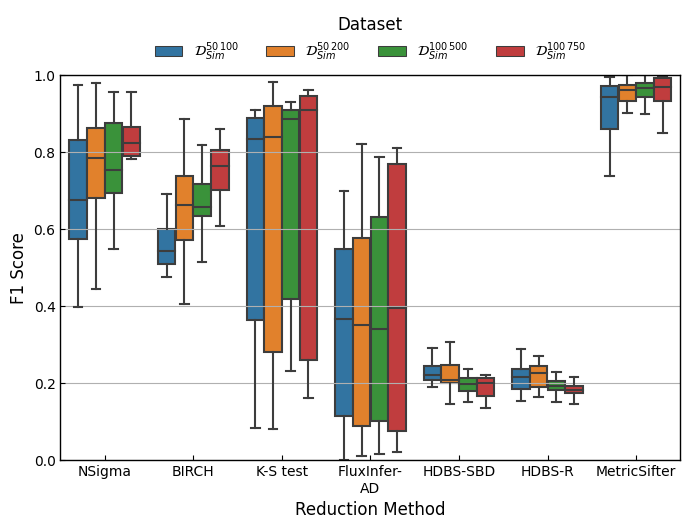

In [30]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="f1_score",
    legend_title="Dataset",
    ylabel_title="F1 Score",
    num_of_hue=4,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplot

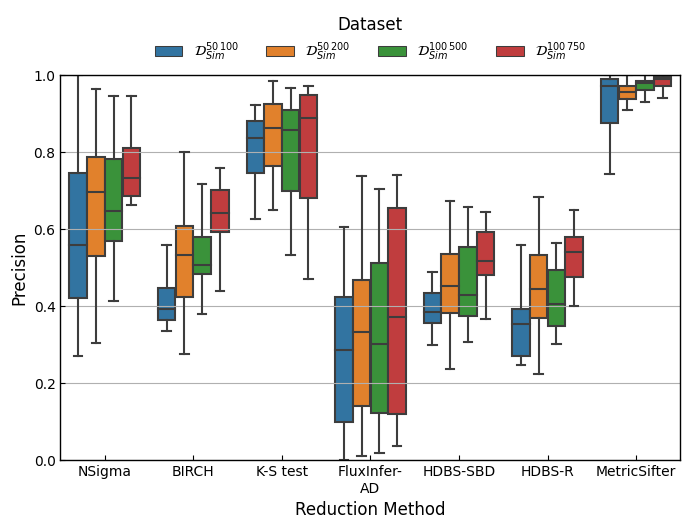

In [31]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="precision",
    legend_title="Dataset",
    ylabel_title="Precision",
    num_of_hue=4,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplot

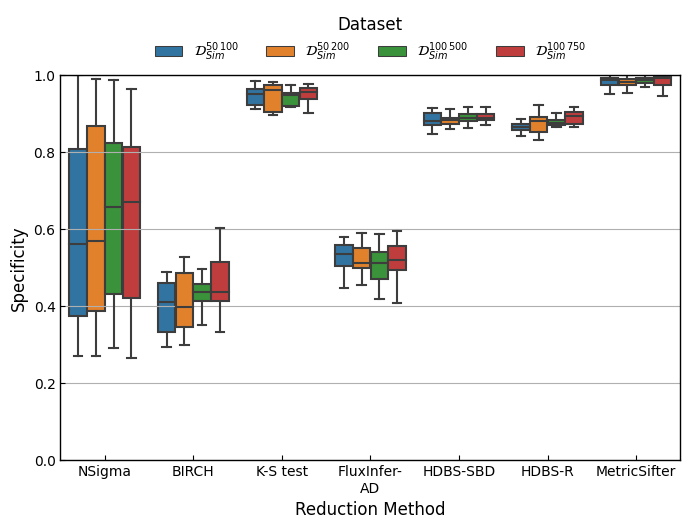

In [32]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="specificity",
    legend_title="Dataset",
    ylabel_title="Specificity",
    num_of_hue=4,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplot

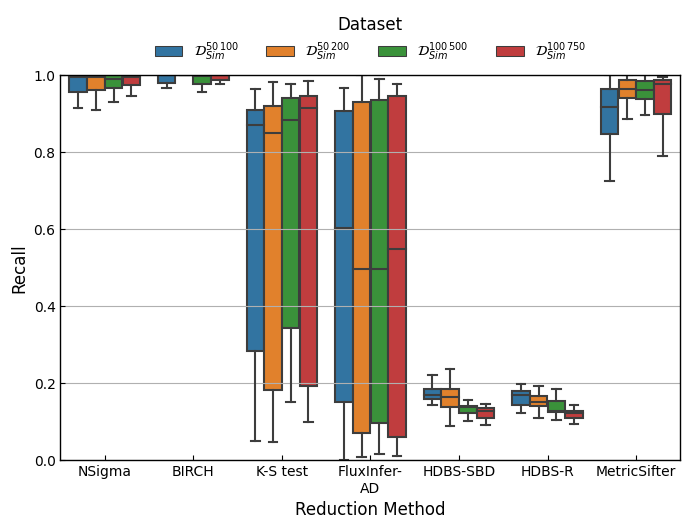

In [33]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="recall",
    legend_title="Dataset",
    ylabel_title="Recall",
    num_of_hue=4,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplot

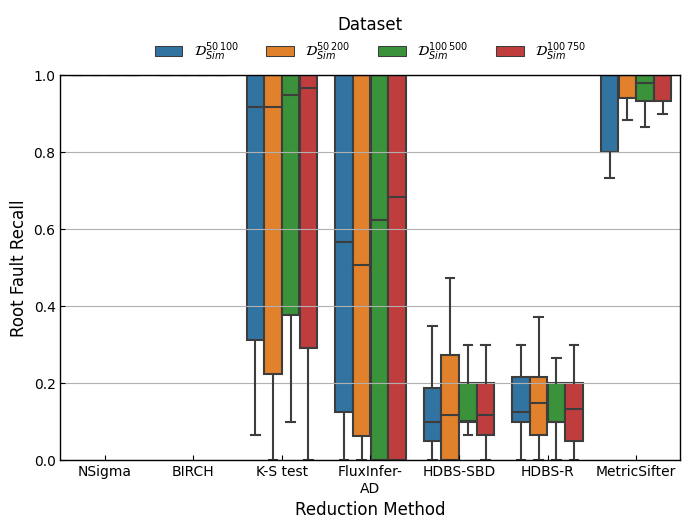

In [34]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="root_cause_recall",
    legend_title="Dataset",
    ylabel_title="Root Fault Recall",
    num_of_hue=4,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol D from STIXNonUnicode
INFO:matplot

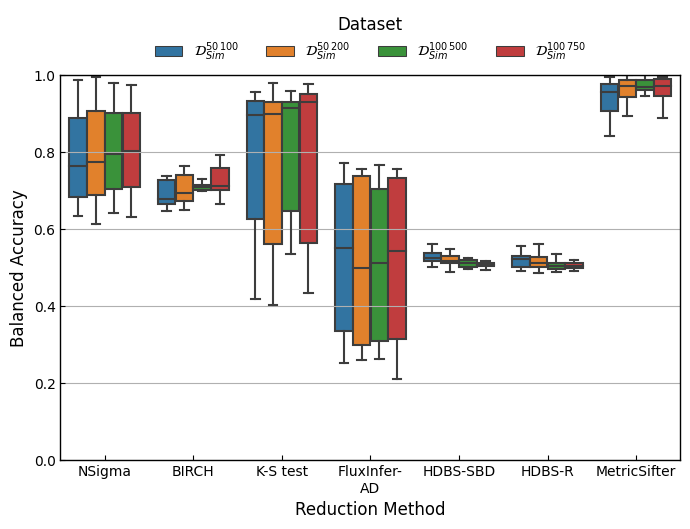

In [35]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="dataset",
    evaluation_metric="bacc",
    legend_title="Dataset",
    ylabel_title="Balanced Accuracy",
    num_of_hue=4,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


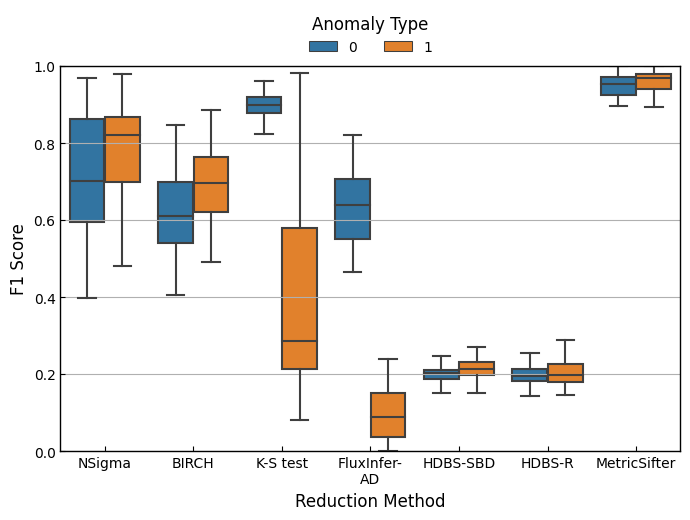

In [36]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="anomaly_type",
    evaluation_metric="f1_score",
    legend_title="Anomaly Type",
    ylabel_title="F1 Score",
    num_of_hue=3,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


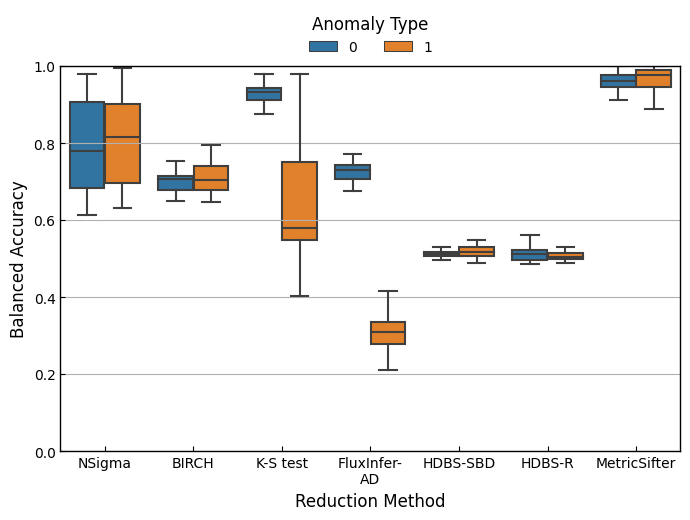

In [37]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="anomaly_type",
    evaluation_metric="bacc",
    legend_title="Anomaly Type",
    ylabel_title="Balanced Accuracy",
    num_of_hue=3,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


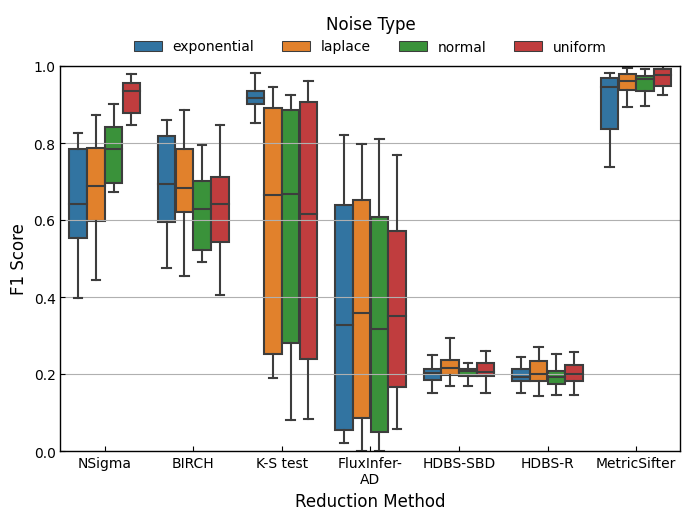

In [38]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="noise_type",
    evaluation_metric="f1_score",
    legend_title="Noise Type",
    ylabel_title="F1 Score",
    num_of_hue=4,
)


/tmp/ipykernel_1714629/2077959414.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


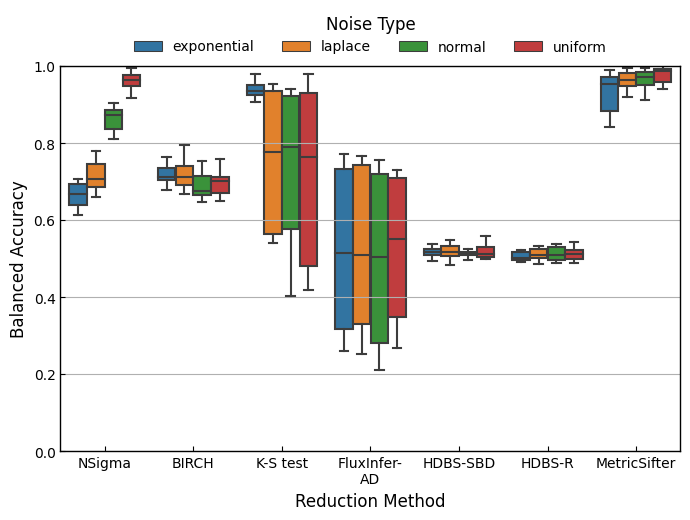

In [39]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="noise_type",
    evaluation_metric="bacc",
    legend_title="Noise Type",
    ylabel_title="Balanced Accuracy",
    num_of_hue=4,
)


In [17]:
plot_perf_of_reduction(
    fl_df.reset_index(),
    hue="weight_generator",
    evaluation_metric="bacc",
    legend_title="Weight Generator",
    ylabel_title="Balanced Accuracy",
    num_of_hue=2,
)


NameError: name 'plot_perf_of_reduction' is not defined

## Params Sensitivity

In [213]:
from simulation.feature_reduction import sweep_metricsifter_params
from simulation.feature_reduction import logger

logger.setLevel("WARN")

params_sensitivity_results = sweep_metricsifter_params(
    [0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00],
    anomaly_types=anomaly_types,
    data_scale_params=data_scale_params,
    func_types=func_types,
    noise_types=noise_types,
    weight_generators=weight_generators,
    trial_nos=list(range(1, num_trials+1)),
    n_jobs=-1,
)


Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 1...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 3...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:normal, trian_no 4...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: normal, weight_generator:uniform, trian_no 3...
Running anomaly type 0 with data scale {'num_node': 50, 'num_edge': 100, 'num_normal_samples': 160, 'num_abnormal_samples': 20}, func_type: identity, noise_type: e

In [214]:
params_sensitivity_df = pd.DataFrame(params_sensitivity_results)
# .groupby(["anomaly_type", "num_node", "num_edge", "func_type", "noise_type", "weight_generator", "num_normal_samples", "num_abnormal_samples", "reduction_method", "metricsifter_bandwidth"], as_index=True).mean().sort_index()


/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


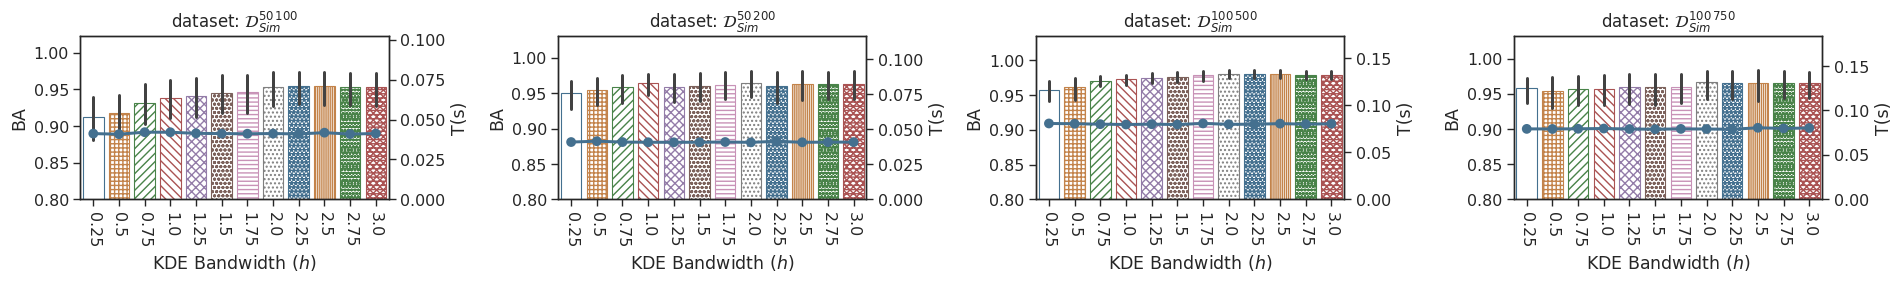

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


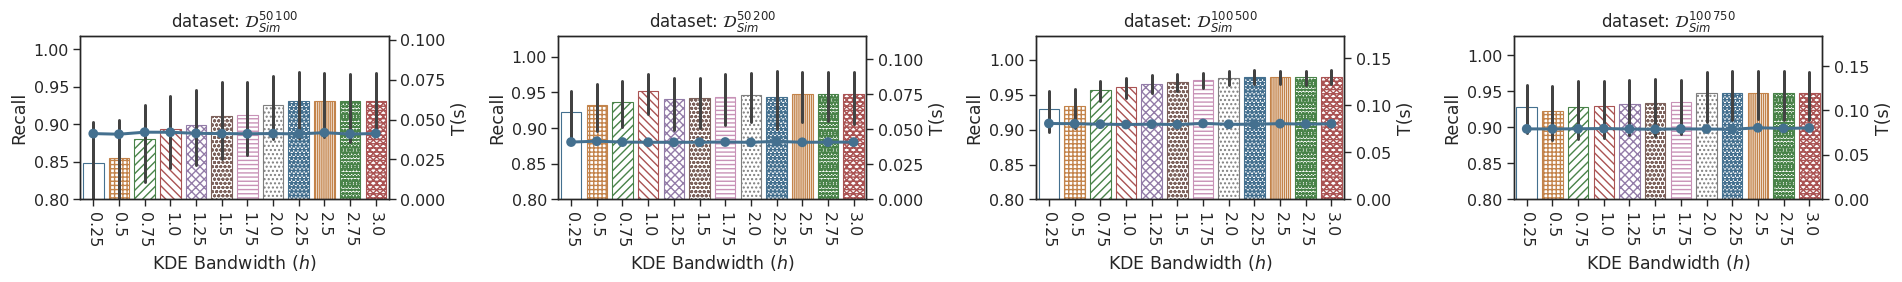

/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


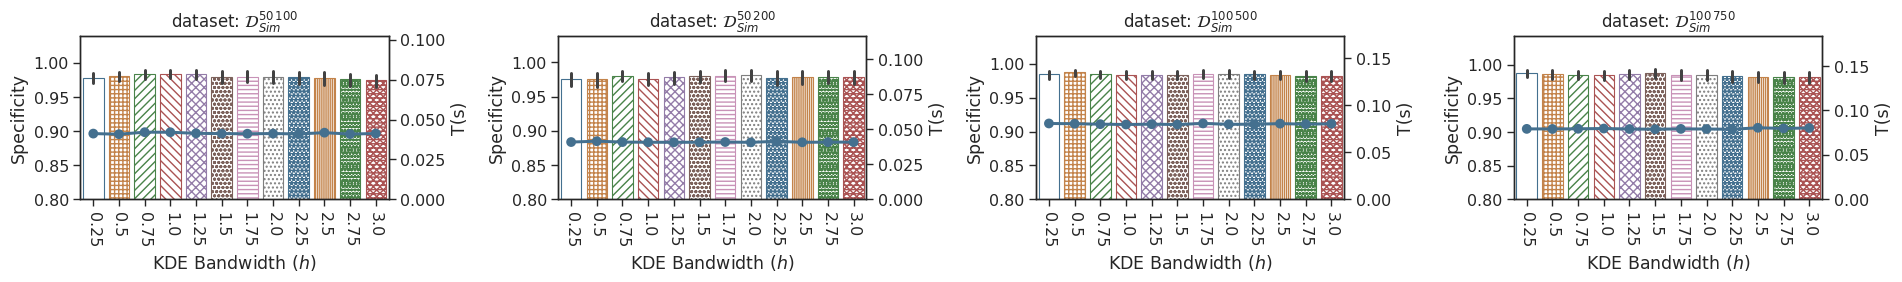

In [223]:
from itertools import cycle
import seaborn as sns

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)
sns.set_palette("tab10", 8, 0.5)


def metric_name(var: str):
    match var:
        case "mcc": return "MCC"
        case "bacc": return "BA"
        case "recall": return "Recall"
        case "specificity": return "Specificity"


def style_boxplot(sns_fig, hatchs):
    # see https://gist.github.com/mourisl/30d9a8e130f80bde382f95b8ccb3f59d
    for i, (box, hatch) in enumerate(zip([p for p in sns_fig.patches if not p.get_label()], hatchs)):
        color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor((0, 0, 0, 0))
        box.set_hatch(hatch)
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
            sns_fig.lines[j].set_color(color)


def facetgrid_two_axes_params(data: pd.DataFrame, x_name: str, xlabel: str, y1_name: str, y2_name: str, ylabel1: str, ylabel2: str, color: str, label: str):
    ax1 = plt.gca()
    # bar = sns.barplot(data, x=x_name, y=y1_name, alpha=.7, ax=ax1, order=order, color="none", fill=None)
    bar = sns.barplot(
        data=data, x=x_name, y=metric,# hue="combination",
        alpha=1, color="none", fill=None,
        # color="none", notch=False, showfliers=False, showcaps=True, showmeans=False,
        ax=ax1,
    )
    # https://stackoverflow.com/questions/76233164/how-to-add-hatches-to-histplot-bars-and-legend
    hatchs = ["","++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "****", "||||||||", "o-o-o-o-o", "x-x-x-x-x", "+-+-+"]
    # for container, hatch, handle, color in zip(ax.containers, hatchs, ax.get_legend().legend_handles, sns.color_palette()):
    # style_boxplot(box, hatchs)
    for patch, hatch, color in zip(bar.patches, hatchs, cycle(sns.color_palette())):
        patch.set_hatch(hatch)
        patch.set_edgecolor(color)

    ax1.grid(False)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=270)
    ax1.autoscale(enable=True, axis='y', tight=False)
    if y1_name == "bacc":
        ax1.set_ylim(ymin=0.8)
    elif y1_name == "recall":
        ax1.set_ylim(ymin=0.8)
    elif y1_name == "specificity":
        ax1.set_ylim(ymin=0.8)
    ax1.ticklabel_format(style="sci", axis="y")

    ax2 = ax1.twinx()
    markers = ["o", "s", "D", "v", "^", "P", "X", "p", "d"]
    sns.pointplot(
        data=data, x=x_name, y=y2_name,
        # order=[], hue_order=[],
        dodge=True,
        markers=markers, linestyles=["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"],
        ax=ax2,
    )

    ax2.grid(False)
    ax2.set_ylabel(ylabel2)
    ax2.set_ylabel("T(s)")
    ymax = data["elapsed_time_tsdr"].max() * 1.5
    ax2.set_ylim(ymin=0, ymax=ymax)
    ax2.ticklabel_format(style="sci", axis="y")


def plot_tsdr_perf_and_time(data_df: pd.DataFrame, metric: str):
    data_df = data_df.reset_index()
    data_df["node/edge"] = data_df["num_node"].astype(str) + "/" + data_df["num_edge"].astype(str)
    data_df["dataset"] = data_df.apply(lambda x: map_dataset(x), axis=1)
    g = sns.FacetGrid(
        data_df, col="dataset",  height=3.0, aspect=1.6,
        # col_order=col_order,
        col_wrap=4,
        margin_titles=True, despine=False,
        sharex=True, sharey=False,
    )
    g.set_titles(row_template='{row_name}', col_template='dataset: {col_name}', size=12)
    g.map_dataframe(
        facetgrid_two_axes_params,
        x_name="metricsifter_bandwidth", xlabel=r'KDE Bandwidth ($h$)',
        y1_name=metric, y2_name="elapsed_time_tsdr", ylabel1=metric_name(metric), ylabel2='T(s)', label="",
    )
    g.tight_layout()

    # ax2.get_legend().remove()
    # sns.move_legend(
    #     ax, "lower center",
    #     bbox_to_anchor=(.5, 1), ncol=3, title="Parameter Set (search, cost, penalty)", frameon=False,
    # )

    g.savefig(f"materials/plot_simulation_tsdr_params_sensitivity_{metric}.pdf", format="pdf", bbox_inches="tight")
    plt.show()


for metric in ["bacc", "recall", "specificity"]:
    plot_tsdr_perf_and_time(params_sensitivity_df, metric)


### RCA evaluation

In [224]:
import sys
sys.path.append('../PyRCA')


In [225]:
import pathlib

localization_dfs = []
for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}.pkl.gz", compression="gzip")
    localization_df.drop(localization_df[localization_df["localization_method"] == "RCD"].index, inplace=True)
    localization_df.drop(localization_df[localization_df["reduction_method"] == "MetricSifter"].index, inplace=True)
    localization_dfs.append(localization_df)

for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}_MetricSifter.pkl.gz", compression="gzip")
    localization_df.drop(localization_df[localization_df["localization_method"] == "RCD"].index, inplace=True)
    localization_dfs.append(localization_df)

for i in range(1, num_trials + 1):
    localization_df = pd.read_pickle(f"./materials/pyrca_feature_reduction_simulation_localization_results_{i}_rcd.pkl.gz", compression="gzip")
    localization_dfs.append(localization_df)

localization_df = pd.concat(localization_dfs)
localization_df["elapsed_time_sum"] = localization_df["elapsed_time_tsdr"] + localization_df["elapsed_time_loc"]
localization_df


trial_no   k metric      score    hit  num_root_causes  \
34           1   1    X45   0.256301  False                2   
35           1   1    X37  81.361820   True                2   
36           1   2    X25  43.147260  False                2   
37           1   3    X46  39.559394  False                2   
38           1   4    X21  36.181941  False                2   
...        ...  ..    ...        ...    ...              ...   
8886         5  56    X73   0.010000   True                1   
8887         5  57    X33   0.010000  False                1   
8888         5  58    X21   0.010000  False                1   
8889         5  59    X48   0.010000  False                1   
8890         5  60     X5   0.010000  False                1   

     localization_method  elapsed_time_loc  num_node  num_edge  ...  \
34      EpsilonDiagnosis          1.112717        50       100  ...   
35             LiNGAM+HT          2.907223        50       100  ...   
36             LiNGAM+HT          2.907223        50       100  ...   
37             LiNGAM+HT          2.907223        50       100  ...   
38             LiNGAM+HT          2.907223        50       100  ...   
...                  ...               ...       ...       ...  ...   
8886                 RCD          3.450977       100       750  ...   
8887                 RCD          3.450977       100       750  ...   
8888                 RCD          3.450977       100       750  ...   
8889                 RCD          3.450977       100       750  ...   
8890                 RCD          3.450977       100       750  ...   

      num_total  reduction_rate  root_cause_recall  recall precision  \
34           50            0.48                0.5  0.9375  0.576923   
35           50            0.48                0.5  0.9375  0.576923   
36           50            0.48                0.5  0.9375  0.576923   
37           50            0.48                0.5  0.9375  0.576923   
38           50            0.48                0.5  0.9375  0.576923   
...         ...             ...                ...     ...       ...   
8886        100            0.00                1.0  1.0000  0.610000   
8887        100            0.00                1.0  1.0000  0.610000   
8888        100            0.00                1.0  1.0000  0.610000   
8889        100            0.00                1.0  1.0000  0.610000   
8890        100            0.00                1.0  1.0000  0.610000   

     specificity  f1_score      bacc  elapsed_time_tsdr  elapsed_time_sum  
34      0.676471  0.714286  0.806985           0.005291          1.118008  
35      0.676471  0.714286  0.806985           0.005291          2.912514  
36      0.676471  0.714286  0.806985           0.005291          2.912514  
37      0.676471  0.714286  0.806985           0.005291          2.912514  
38      0.676471  0.714286  0.806985           0.005291          2.912514  
...          ...       ...       ...                ...               ...  
8886    0.000000  0.757764  0.500000           0.000007          3.450985  
8887    0.000000  0.757764  0.500000           0.000007          3.450985  
8888    0.000000  0.757764  0.500000           0.000007          3.450985  
8889    0.000000  0.757764  0.500000           0.000007          3.450985  
8890    0.000000  0.757764  0.500000           0.000007          3.450985  

[141356 rows x 28 columns]

In [226]:
loc_head_df = localization_df.groupby(
    by=["num_node", "num_edge", "anomaly_type", "func_type", "noise_type", "weight_generator", "localization_method", "reduction_method", "trial_no"],
    as_index=True,
).head(n=1)


In [227]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(
        loc_head_df.query("reduction_method == 'MetricSifter' & trial_no == 1 & localization_method in ['RCD', 'EpsilonDiagnosis']")
    )


trial_no  k metric     score    hit  num_root_causes  \
37           1  1     X1  0.210455  False                2   
81           1  1    X11  0.217829  False                4   
601          1  1    X53  0.233770   True                2   
659          1  1    X41  0.306588  False                2   
711          1  1    X14  0.314132  False                1   
801          1  1    X34  0.240718  False                1   
846          1  1    X68  0.220065  False                2   
888          1  1    X23  0.408677  False                2   
976          1  1    X46  0.271969  False                2   
1024         1  1    X22  0.256117  False                3   
1071         1  1    X21  0.577854  False                3   
1123         1  1    X30  0.384980  False                2   
1350         1  1     X1  0.207300  False                3   
1398         1  1    X15  0.302190   True                4   
1490         1  1    X10  0.260133  False                1   
1532         1  1    X19  0.306313  False                2   
1585         1  1     X3  0.340345  False                4   
1723         1  1     X7  0.196867  False                3   
1882         1  1    X17  0.400790   True                4   
1937         1  1    X45  0.360385  False                2   
2028         1  1    X48  0.321235  False                2   
2205         1  1    X45  0.208816  False                5   
2386         1  1    X70  0.211236  False                3   
2430         1  1   X100  0.348695  False                1   
2524         1  1    X44  0.325923  False                2   
0            1  1     X4  0.270000  False                2   
91           1  1     X1  0.340000  False                2   
193          1  1    X10  0.330000  False                4   
295          1  1    X50  1.000000  False                1   
313          1  1     X1  0.330000  False                1   
365          1  1     X7  0.300000  False                1   
440          1  1    X18  0.350000  False                1   
545          1  1    X49  0.410000   True                3   
640          1  1    X21  0.340000  False                1   
738          1  1     X4  0.330000   True                2   
843          1  1    X32  0.130000  False                3   
1006         1  1    X11  0.290000  False                1   
1139         1  1    X10  0.530000   True                1   
1181         1  1     X2  0.390000  False                1   
1226         1  1    X16  0.530000  False                2   
1264         1  1     X6  0.730000  False                1   
1315         1  1     X1  0.350000  False                2   
1401         1  1     X2  0.380000  False                1   
1431         1  1    X28  0.130000  False                2   
1703         1  1     X6  0.180000  False                1   
1808         1  1     X4  0.290000  False                2   
1867         1  1     X8  0.110000  False                1   
2144         1  1    X15  0.120000  False                2   
2379         1  1    X34  0.140000  False                2   
2523         1  1    X44  0.110000  False                4   
2789         1  1    X62  0.120000  False                2   
3025         1  1    X34  0.120000  False                3   
3307         1  1    X28  0.140000   True                3   
3456         1  1     X1  0.100000  False                2   
3690         1  1    X42  0.160000  False                1   
3965         1  1    X40  0.100000  False                2   
4346         1  1    X21  0.410000  False                3   
4469         1  1     X1  0.440000  False                1   
4544         1  1    X19  0.990000   True                4   
4623         1  1     X5  0.930000   True                3   
4803         1  1     X6  0.990000  False                4   
4884         1  1     X6  0.990000  False                2   
4970         1  1     X2  0.300000  False                1   
5055         1  1    X10  1.000000   T

In [228]:
def recall(X: pd.Series) -> pd.Series:
    k_values = list(range(1, X["k"].max()+1))
    acc_at_k = {k: .0 for k in k_values}
    num_anomalies: int = X["trial_no"].max()

    for k in k_values:
        for i in range(1, num_anomalies+1):
            x = X.loc[X["trial_no"] == i]
            num_root_causes = x["num_root_causes"].max()  # assume the same for all trials
            num_hit = x.loc[x["k"] <= k]["hit"].sum()
            acc_at_k[k] += num_hit / num_root_causes

        acc_at_k[k] /= num_anomalies

    return pd.Series(acc_at_k)

def avg_recall(X: pd.Series) -> pd.Series:
    max_k = X["k"].max()
    acc = recall(X)
    return pd.Series({k: acc.iloc[:k].sum() / k for k in range(1, max_k + 1)})


In [229]:
from pandarallel import pandarallel
pandarallel.initialize()

def score(row: pd.Series):
    rec = recall(row)
    avgrec = avg_recall(row)
    return pd.Series({"ac@2": rec.get(2, .0), "ac@5": rec.get(5, .0), "avg@5": avgrec.get(5, .0), "elapsed_time_sum": row["elapsed_time_sum"].mean()})

localization_grouped_df = localization_df.groupby(
    ["num_node", "num_edge", "anomaly_type", "func_type", "noise_type", "weight_generator", "localization_method", "reduction_method"],
    as_index=True,
).parallel_apply(score)


INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [230]:
localization_grouped_df


ac@2  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method         
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH              0.0   
                                                                                          FluxInfer-AD       0.0   
                                                                                          HDBS-SBD           0.0   
                                                                                          K-S test           0.0   
                                                                                          MetricSifter       0.0   
...                                                                                                          ...   
100      750      1            identity  uniform     uniform          RCD                 HDBS-SBD           0.0   
                                                                                          K-S test           NaN   
                                                                                          MetricSifter       0.1   
                                                                                          NSigma             0.2   
                                                                                          None               0.2   

                                                                                                                ac@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method             
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH             0.000000   
                                                                                          FluxInfer-AD      0.000000   
                                                                                          HDBS-SBD          0.000000   
                                                                                          K-S test          0.000000   
                                                                                          MetricSifter      0.000000   
...                                                                                                              ...   
100      750      1            identity  uniform     uniform          RCD                 HDBS-SBD          0.000000   
                                                                                          K-S test               NaN   
                                                                                          MetricSifter      0.300000   
                                                                                          NSigma            0.200000   
                                                                                          None              0.266667   

                                                                                                            avg@5  \
num_node num_edge anomaly_type func_type noise_type  weight_generator localization_method reduction_method          
50       100      0            identity  exponential normal           EpsilonDiagnosis    BIRCH              0.00   
                                                                                          FluxInfer-AD       0.00   
                                                                                          HDBS-SBD           0.00   
                                                                                          K-S test           0.00   
                                                                                          MetricSifter       0.00   
...                                                                                                           ...   
100      750      1            identity  uniform     uniform          RCD                 HDBS-SBD    

In [231]:
import matplotlib
import seaborn as sns

LOCALIZATUON_METHODS = [
    "EpsilonDiagnosis",
    "PC+HT",
    "LiNGAM+HT",
    # "GES+HT",
    "PC+PageRank",
    "LiNGAM+PageRank",
    "RCD",
    # "GES+PageRank",
    # "PC+RW-2",
    # "LiNGAM+RW-2",
    # "GES+RW-2",
]

REDUCTION_METHODS = [
    "None", "NSigma", "BIRCH", "K-S test", "FluxInfer-AD", "HDBS-SBD", "HDBS-R", "MetricSifter",
]
# LOC_METHODS = ["RS", "e-Diagnosis", "CG+PageRank", "PC+PageRank", "LiNGAM+PageRank", "PC+HT", "LiNGAM+HT", "RCD"]

sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)
sns.set_palette("tab10", 8, 0.5)


def wrap_loc(label):
    return "+\n".join(str(label.get_text()).split("+"))

def style_boxplot(sns_fig, hatchs):
    # see https://gist.github.com/mourisl/30d9a8e130f80bde382f95b8ccb3f59d
    for i, (box, hatch) in enumerate(zip([p for p in sns_fig.patches if not p.get_label()], hatchs)):
        color = box.get_facecolor()
        box.set_edgecolor(color)
        box.set_facecolor((0, 0, 0, 0))
        box.set_hatch(hatch)
        # iterate over whiskers and median lines
        for j in range(5*i,5*(i+1)):
            sns_fig.lines[j].set_color(color)

def facetgrid(data: pd.DataFrame, x_name: str, y1_name: str, ylabel1: str, order: list[str], color: str, label: str):
    ax1 = plt.gca()
    sns_fig = sns.boxplot(
        data, x=x_name, y=y1_name, ax=ax1, order=order,
        color="none", notch=False, showfliers=False, showcaps=True,
    )
    ax1.grid(False)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=-90)
    ax1.autoscale(enable=True, axis='y', tight=False)
    ax1.ticklabel_format(style="sci", axis="y")

    hatchs = ["++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "****"]
    style_boxplot(sns_fig, hatchs)

def facetgrid_two_axes(data: pd.DataFrame, x_name: str, y1_name: str, y2_name: str, ylabel1: str, ylabel2: str, order: list[str], color: str, label: str):
    ax1 = plt.gca()
    sns_fig = sns.boxplot(
        data, x=x_name, y=y1_name, ax=ax1, order=order,
        color="none", notch=False, showfliers=False, showcaps=True,
    )
    ax1.grid(False)
    ax1.set_ylabel(ylabel1)
    ax1.set_xticks(np.arange(len(ax1.get_xticklabels())))
    ax1.set_xticklabels([wrap(l) for l in ax1.get_xticklabels()], rotation=-90)
    ax1.autoscale(enable=True, axis='y', tight=False)
    ax1.ticklabel_format(style="sci", axis="y", scilimits=(-2,2))

    hatchs = ["++++","////","\\\\\\\\","xxxx", "oooo", "----", "....", "****"]
    style_boxplot(sns_fig, hatchs)
    # for _bar, hatch in zip(sns_fig.patches, hatchs):
    #     _bar.set_hatch(hatch)
    #     _bar.set_edgecolor(color)

    if data["localization_method"].apply(lambda x: x == "RS").all():
        return

    ax2 = ax1.twinx()
    sns.pointplot(data, x=x_name, y=y2_name, ax=ax2, order=order)
    ax2.grid(False)
    ax2.set_ylabel(ylabel2)
    ax2.autoscale(enable=True, axis='y', tight=False)
    ax2.ticklabel_format(style="sci", axis="y")


def plot_grid(data: pd.DataFrame):
    data["node/edge"] = data["num_node"].astype(str) + "/" + data["num_edge"].astype(str)
    data["dataset"] = data.apply(lambda x: map_dataset(x), axis=1)

    row_order = LOCALIZATUON_METHODS
    col_order = data["dataset"].unique().tolist()
    map_x = "reduction_method"
    map_x_order = REDUCTION_METHODS

    g = sns.FacetGrid(
        data, col="dataset", row="localization_method", height=2.8, aspect=1.3, col_order=col_order, margin_titles=True, despine=False, row_order=row_order,
        sharex=True, sharey=False,
    )
    g.set_titles(row_template='{row_name}', col_template='{col_var}: {col_name}', size=12)
    g.map_dataframe(
        facetgrid_two_axes, x_name=map_x, y1_name="avg@5", y2_name="elapsed_time_sum", ylabel1='AVG@5', ylabel2="T(s)", order=map_x_order, label="",
        # facetgrid, x_name=map_x, y1_name="avg@5", ylabel1='AVG@5', order=map_x_order, label="",
    )
    g.set_axis_labels(x_var='Reduction Method')
    for ax in g.axes.flat:
        for text in ax.texts:
            if isinstance(text, matplotlib.text.Annotation):
                # adjust the position of the row text
                text.set_x(text.get_position()[0] + 0.4)

    # skip empty plots
    # https://stackoverflow.com/questions/40186545/how-to-avoid-empty-grids-in-seaborn-facetgrid
    for (i,j,k), data in g.facet_data():
        if data.empty:
            ax = g.facet_axis(i, j)
            ax.set_axis_off()

    g.figure.subplots_adjust(wspace=0, hspace=0)
    g.tight_layout()
    g.savefig(f"materials/simulation_reduction_and_localization_grid_dataset_and_localization.pdf", format="pdf", bbox_inches="tight")


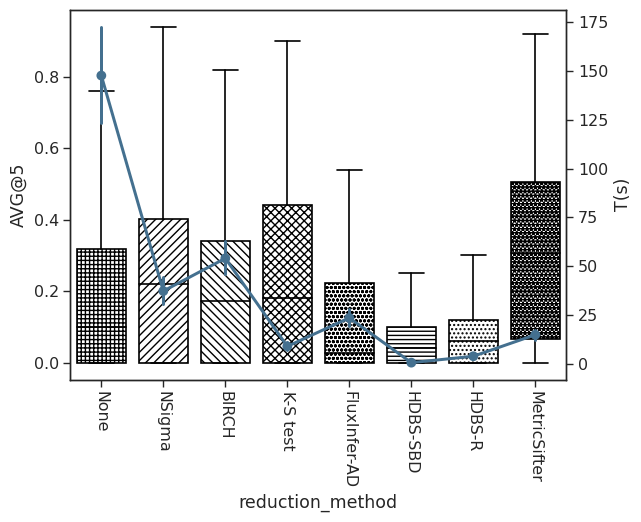

In [232]:
facetgrid_two_axes(data=localization_grouped_df.fillna(0).reset_index(), x_name="reduction_method", y1_name="avg@5", y2_name="elapsed_time_sum", ylabel1='AVG@5', ylabel2="T(s)", order=REDUCTION_METHODS, color="", label="")


/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


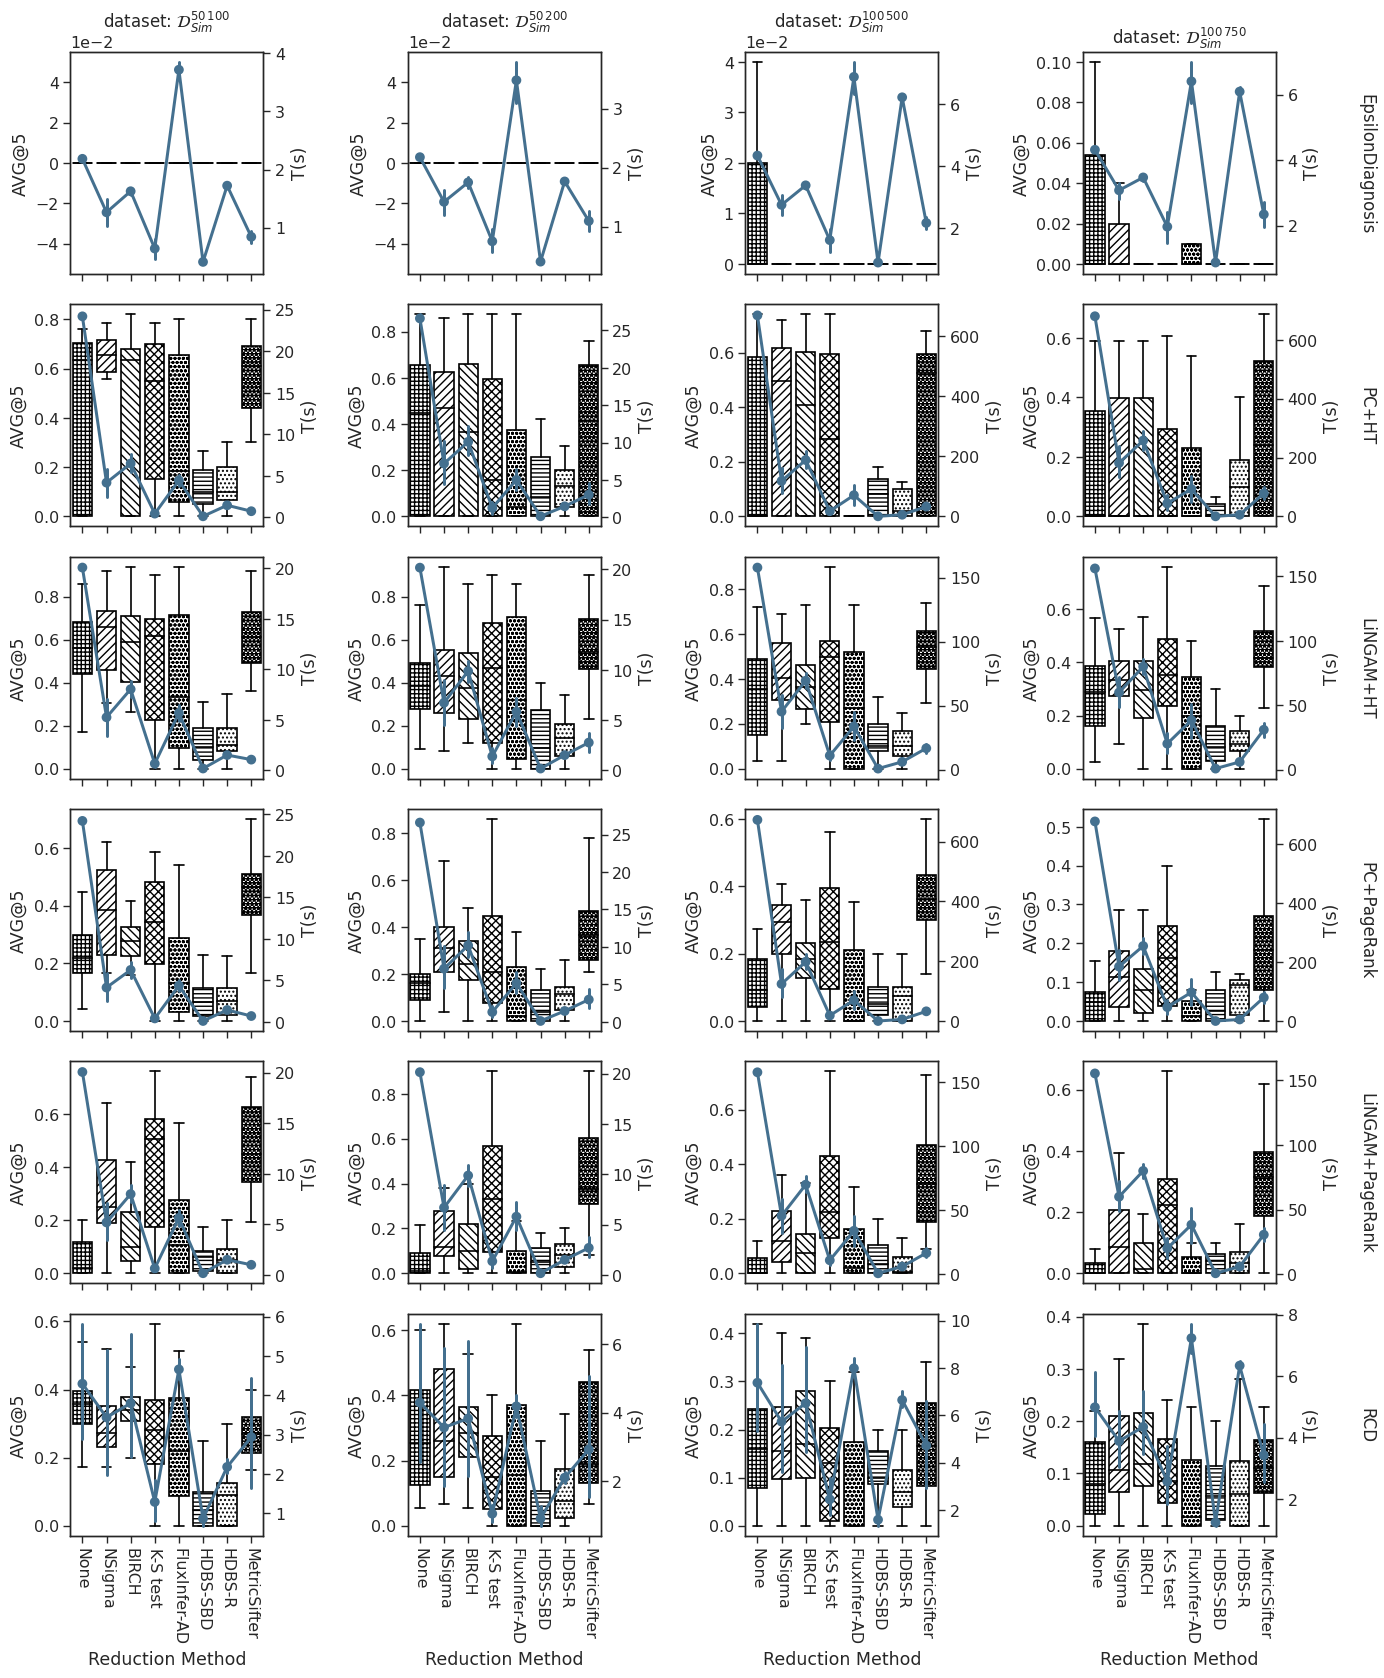

In [233]:
plot_grid(localization_grouped_df.fillna(0).reset_index())


In [234]:
# Investigate why MetricSifter is slow
from simulation.synthetic_data import load_data

normal_data_df, abnormal_data_df, true_root_causes, adjacency_df, anomaly_propagated_nodes = load_data(
    anomaly_type=0,
    data_params=dict(
        num_node=100,
        num_edge=750,
        num_normal_samples=160,
        num_abnormal_samples=20,
    ),
    func_type="identity",
    noise_type="normal",
    weight_generator="normal",
    trial_no=2,
)


In [235]:
from tsdr.multireducer import change_point_clustering_with_kde

concated_data_df = pd.concat([normal_data_df, abnormal_data_df], axis=0, ignore_index=True)
cinfo, remove_metrics = change_point_clustering_with_kde(
    concated_data_df,
    search_method="pelt",
    cost_model="l2",
    penalty="bic",
    n_bkps=1,
    kde_bandwidth=1.0,
    kde_bandwidth_adjust=1.0,
    multi_change_points=True,
    representative_method=False,
    segment_selection_method="weighted_max",
    n_jobs=1,
)


In [236]:
len(remove_metrics)


39

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

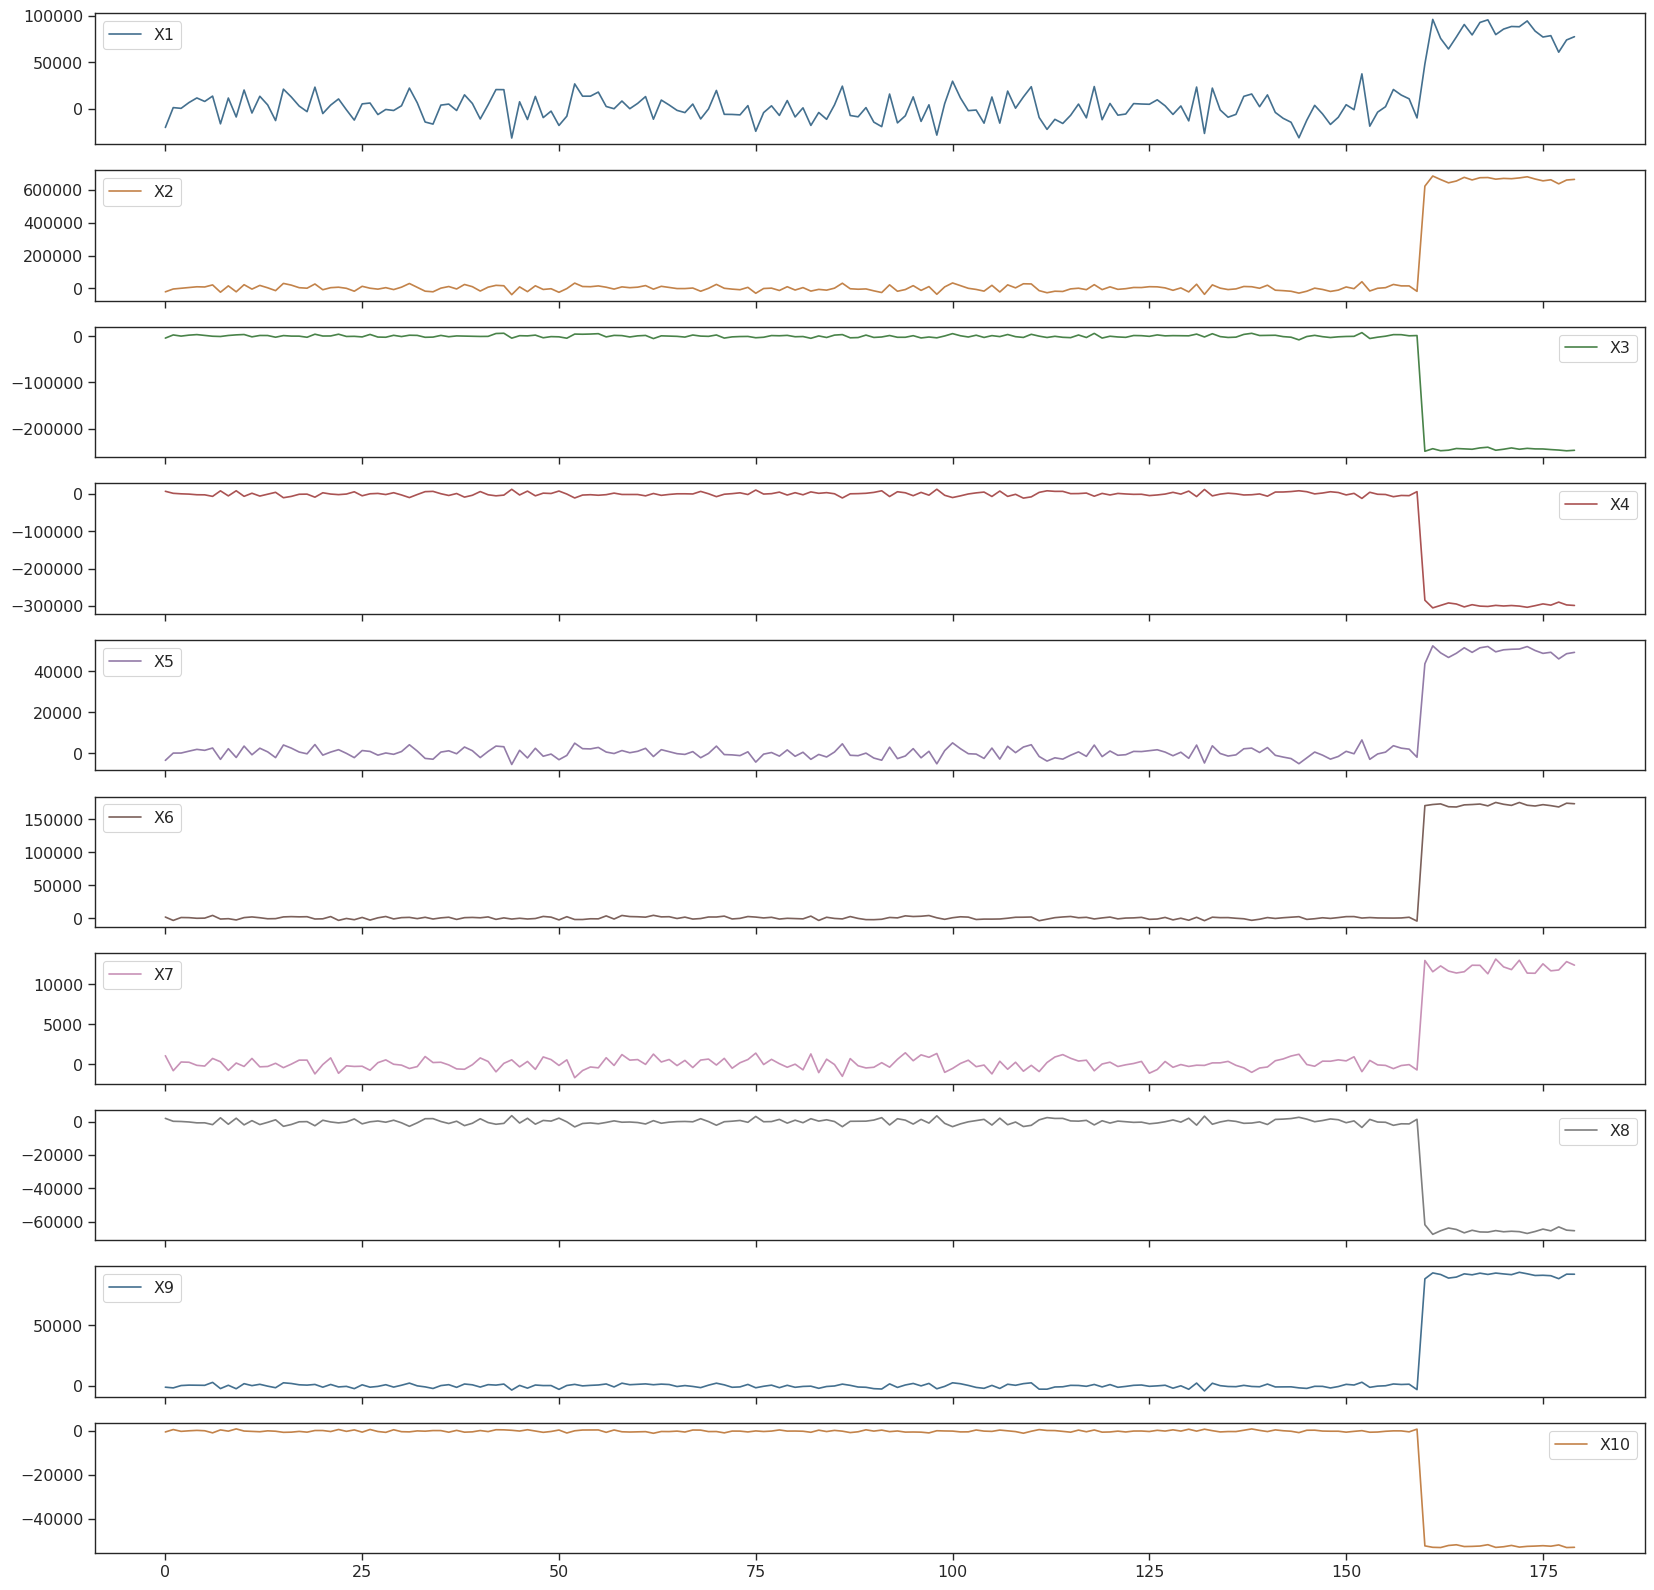

In [237]:
concated_data_df.iloc[:, 0:10].plot(subplots=True, figsize=(20, 20))
